In [1]:
import numpy as np
import matplotlib.pyplot as plt
from optical_element_io import *
from column_io import OpticalColumn
from calculate_optical_properties import calc_properties_mirror
from automation import optimize_image_plane, optimize_many_shapes, optimize_planes_for_retracing, optimize_voltages_for_retracing, optimize_broadly_for_retracing
from importlib import reload
import asyncio

In [30]:
obj = ElecLens("/home/trh/data/mirror/base/curvedspacedmir5elec03_retracing_30kV.dat",verbose=True)
obj.mirror_type(mirror=True,curved_mirror=True)
obj.write("/home/trh/data/mirror/base/test.dat")
col = OpticalColumn(obj)
col.mircondfilename  = "/home/trh/data/mirror/base/test.dat"
# col.mircondbasename_noext  = "mir_curved4_col09_man_ret"
source_pos = 99.9912
col.write_raytrace_file(col.mircondfilename,minimum_rays=True,
                        source_pos=source_pos-0.0001,screen_pos=source_pos,
                        potentials=MirPotentials(obj,[-500,6671,30000,200000],['f','f','f','f']))

Reading file /home/trh/data/mirror/base/curvedspacedmir4elec07_retracing_man_ret.dat 
with title: four-electrode mirror
Warning! This data file seems to have curvature coordinates. Setting so=True.


In [31]:
obj.calc_field()
# calc_properties_mirror(obj,col)
col.calc_rays()
print(col.evaluate_retracing())



     *******************************************************************
     *                                                                 *
     *                       SOFEM-FIELD+RAYTRACE                      *
     *                                                                 *
     *       For Analysing Magnetic and Electrostatic Lenses and       *
     *     Deflectors Using the Second-Order Finite Element Method     *
     *                                                                 *
     *                         CL Version 1.1                          *
     *    Copyright (C) Munro's Electron Beam Software Ltd  Jul 2020   *
     *                                                                 *
     *******************************************************************


       SOELENS Module    For Computing Potential Distribution
       ---------------   ------------------------------------
                         of Electrostatic Lenses
                    

In [32]:
%matplotlib
col.plot_rays() #width=50,height=20)

Using matplotlib backend: TkAgg


In [ ]:
print(col)

In [4]:
optimize_planes_for_retracing(col,bounds=(65,200),img_pos=90,
                             potentials=ElecLens.MirPotentials(obj,[-500,6905.87,294749,200000],['f','v1','v2','f']))
# col.write_mir_img_cond_file("/home/trh/data/mirror/base/mir_curved4_col07_retracing.dat",
#                             turning_point=5,source_pos=90,img_pos=95,
#                             potentials=ElecLens.MirPotentials(obj,[-500,10000,100000,200000],['f','v1','v2','f']))
# obj.write_mir_img_cond_file("/home/trh/data/mirror/base/mir_coltest.dat",
#                             turning_point=10,source_pos=60,energy=-100000,screen_pos=60.001,
#                             potentials=ElecLens.MirPotentials(obj,[-10000,10000,-10,10000,100000],['f','v1','v2','v3','f']))
# obj.write_raytrace_file("/home/trh/data/mirror/base/mir_col01.dat",
#                             potentials=ElecLens.MirPotentials(obj,[-500,4568,12573.9,77480.2,200000],['f','f','f','f','f']))
# obj.calc_rays()
# obj.mircondbasename_noext = "m1"
# obj.calc_field()
# calc_properties_mirror(obj,col)



     *******************************************************************
     *                                                                 *
     *                       SOFEM-FIELD+RAYTRACE                      *
     *                                                                 *
     *       For Analysing Magnetic and Electrostatic Lenses and       *
     *     Deflectors Using the Second-Order Finite Element Method     *
     *                                                                 *
     *                         CL Version 1.1                          *
     *    Copyright (C) Munro's Electron Beam Software Ltd  Jul 2020   *
     *                                                                 *
     *******************************************************************


SORAY Module    For Computing Trajectories in Electrostatic and Magnetic Lenses
-------------   ---------------------------------------------------------------
                With Rotational (

KeyboardInterrupt: 



     *******************************************************************
     *                                                                 *
     *                       SOFEM-FIELD+RAYTRACE                      *
     *                                                                 *
     *       For Analysing Magnetic and Electrostatic Lenses and       *
     *     Deflectors Using the Second-Order Finite Element Method     *
     *                                                                 *
     *                         CL Version 1.1                          *
     *    Copyright (C) Munro's Electron Beam Software Ltd  Jul 2020   *
     *                                                                 *
     *******************************************************************


SORAY Module    For Computing Trajectories in Electrostatic and Magnetic Lenses
-------------   ---------------------------------------------------------------
                With Rotational (

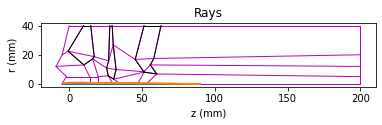

In [5]:
initial_simplex = np.array([[0,0,65],[300000,300000,65],[300000,30000,200],[0,0,200]])
optimize_voltages_for_retracing(col,potentials=ElecLens.MirPotentials(obj,[-500,6905.87,294749,200000],['f','v1','v2','f']),img_pos=90) #,options={'initial_simplex':initial_simplex}) #bounds=[(-10000,190000),(-10000,300000),(65,200)])
# col.write_mir_img_cond_file("/home/trh/data/mirror/base/mir_curved4_col07_retracing.dat",
#                             turning_point=5,source_pos=90,img_pos=95,
#                             potentials=ElecLens.MirPotentials(obj,[-500,10000,100000,200000],['f','v1','v2','f']))
# obj.write_mir_img_cond_file("/home/trh/data/mirror/base/mir_coltest.dat",
#                             turning_point=10,source_pos=60,energy=-100000,screen_pos=60.001,
#                             potentials=ElecLens.MirPotentials(obj,[-10000,10000,-10,10000,100000],['f','v1','v2','v3','f']))
# obj.write_raytrace_file("/home/trh/data/mirror/base/mir_col01.dat",
#                             potentials=ElecLens.MirPotentials(obj,[-500,4568,12573.9,77480.2,200000],['f','f','f','f','f']))
# obj.calc_rays()
# obj.mircondbasename_noext = "m1"
# obj.calc_field()
# calc_properties_mirror(obj,col)

In [ ]:
optimize_broadly_for_retracing(obj,col,potentials=ElecLens.MirPotentials(obj,[-500,7267,403888,200000],['f','v1','v2','f']),img_pos=90,end_z_indices_list=[[1]],end_r_indices_list=[[21,31,41]],z_curv_z_indices_list=[1,1],z_curv_r_indices_list=[21,31])

/mnt/c/Users/Tyler Harvey/Code/trh_tools/simviz/MEBS/optical_element_io.py:99: RuntimeWarning: overflow encountered in double_scalars
  center_angle = np.arccos(0.5*self.point_a.distance(self.point_b)/self.radius)
/mnt/c/Users/Tyler Harvey/Code/trh_tools/simviz/MEBS/optical_element_io.py:99: RuntimeWarning: invalid value encountered in arccos
  center_angle = np.arccos(0.5*self.point_a.distance(self.point_b)/self.radius)


Adaptive search complete
Simplex 1 of 9 complete.
Simplex 2 of 9 complete.
Simplex 3 of 9 complete.
Simplex 4 of 9 complete.
Simplex 5 of 9 complete.
Simplex 6 of 9 complete.
Simplex 7 of 9 complete.
Simplex 8 of 9 complete.
Simplex 9 of 9 complete.


     *******************************************************************
     *                                                                 *
     *                       SOFEM-FIELD+RAYTRACE                      *
     *                                                                 *
     *       For Analysing Magnetic and Electrostatic Lenses and       *
     *     Deflectors Using the Second-Order Finite Element Method     *
     *                                                                 *
     *                         CL Version 1.1                          *
     *    Copyright (C) Munro's Electron Beam Software Ltd  Jul 2020   *
     *                                                                 *
     *************

In [6]:
print('done')

done
